In [1]:
import pandas as pd
path = "D://allen.ardy-iu/Downloads/conversation-count.csv"
df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

C:\Users\allen.ardy-iu\AppData\Local\Temp\ipykernel_5092\3012516682.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df.Date)


In [2]:
monthly_sum = df.groupby(df.Date.dt.to_period('M'))['Total Conversations'].sum()
monthly_sum

Date
2024-01    253
2024-02    222
2024-03    276
2024-04    217
2024-05    234
2024-06    194
2024-07    222
2024-08    217
2024-09    196
2024-10    220
2024-11    229
2024-12    321
Freq: M, Name: Total Conversations, dtype: int64

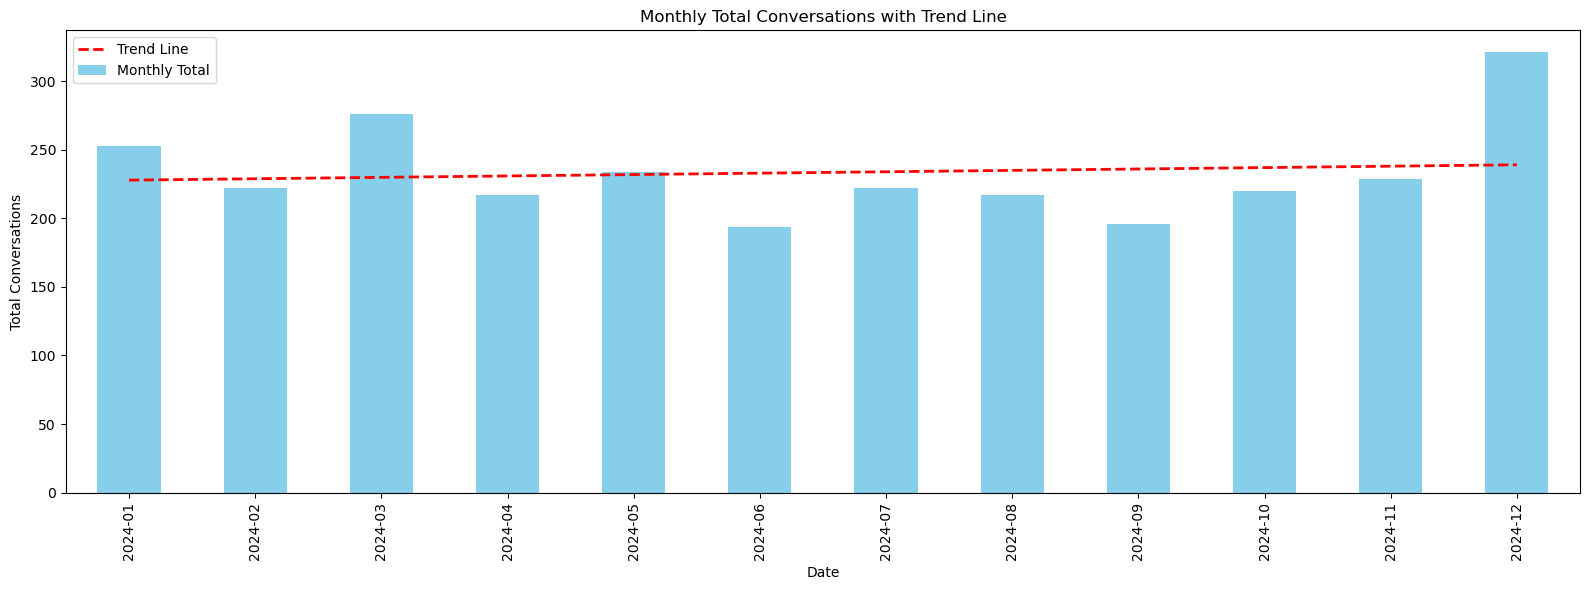

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16,6))  # Make the plot wider
monthly_sum.plot(kind='bar', ax=ax, color='skyblue', label='Monthly Total')

x = np.arange(len(monthly_sum))
z = np.polyfit(x, monthly_sum.values, 1)
p = np.poly1d(z)
ax.plot(x, p(x), color='red', linewidth=2, linestyle='--', label='Trend Line')

ax.set_xlabel('Date')
ax.set_ylabel('Total Conversations')
ax.set_title('Monthly Total Conversations')
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
category_count = [
    {"tag": "Cek Tiket", "count":525},
    {"tag": "Reset Password", "count":453},
    {"tag": "VPN", "count":73},
    {"tag": "Others", "count":530}
]
category_df = pd.DataFrame.from_records(category_count).set_index('tag')

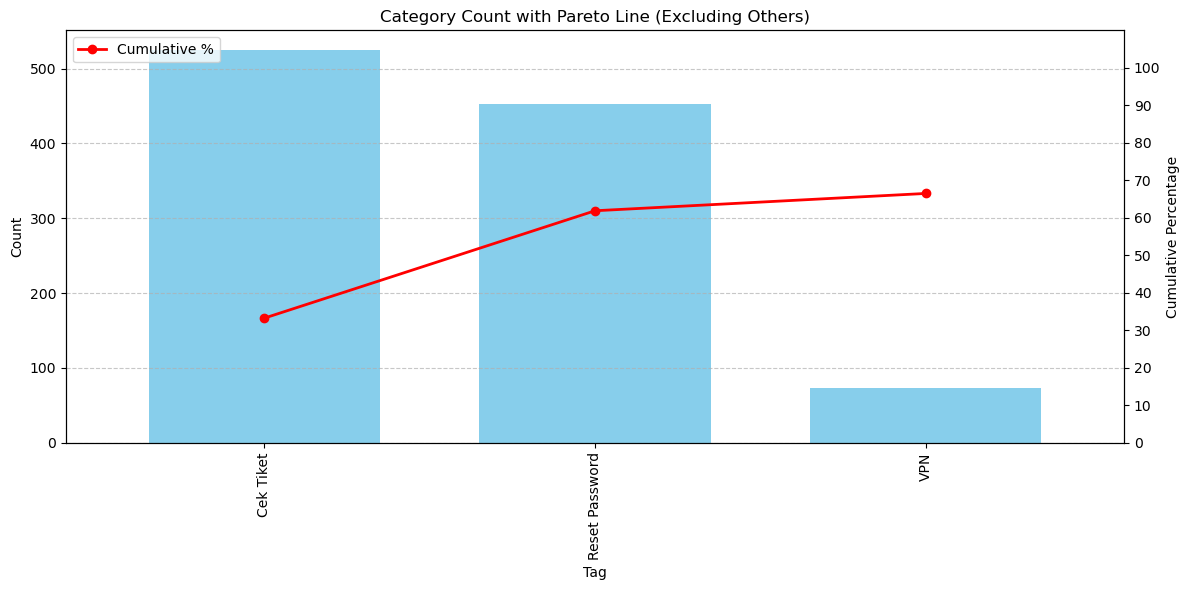

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude 'Others' category for the bars and cumulative count
filtered_df = category_df.drop('Others', errors='ignore')

# The total sum is still from the original (including 'Others')
total_sum = category_df['count'].sum()

fig, ax1 = plt.subplots(figsize=(12,6))  # Make the plot wider

# Bar plot for counts (excluding 'Others')
bars = filtered_df['count'].plot(kind='bar', ax=ax1, color='skyblue', width=0.7)
ax1.set_ylabel('Count')
ax1.set_xlabel('Tag')
ax1.set_title('Category Count with Cumulative Line')

# Calculate cumulative percentage for Pareto line
counts_sorted = filtered_df.sort_values('count', ascending=False)
cumperc = 100 * counts_sorted['count'].cumsum() / total_sum  # denominator is the full sum (including 'Others')

# Pareto line (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(counts_sorted.index, cumperc, color='red', marker='o', linestyle='-', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim(0, 110)
ax2.yaxis.set_ticks(np.arange(0, 110, 10))

# Show grid and legend
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()